# 시나리오
- 고객들의 상품 평가 분석이 필요
- 상품 페이지의 많은 댓글을 사람이 일일이 읽어보고 분류하기 어려움
- 딥러닝으로 이러한 상황을 해결해보고자 함(감성 분석)

## 순차 데이터(sequential data)
- 텍스트, 시계열 데이터와 같은 순서에 의미가 있는 데이터를 지칭함
    - "I am a boy"는 말이 되지만 "boy am a I"는 말이 되지 않는 것과 같은 데이터
    - 날짜별 온도를 기록한 데이터에서 날짜를 섞으면 온도를 기록한 의미가 적어짐

- 현재 시나리오에서 사용하려는 댓글은 텍스트데이터이며 이것은 순차데이터임
- 순차데이터는 순서를 유지하면서 신경망에 주입되어야 함(섞이면 안 됨)
- 이전 입력 데이터를 기억하는 기능이 필요
    - "별로지만 추천해요"라는 댓글은 부정적인 의미가 들어있는데 "추천해요"만 보고 무조건적으로 긍정이라 판단하면 안 됨
- 완전 연결 신경망 또는 합성곱 신경망은 이러한 기억을 위한 장치가 없음(feedforward neural network)
    - 정방향으로 층을 지날때마다 이전 샘플은 버려지고 새로운 데이터로 다음 층을 학습하는 개념

### 신경망의 종류
- 신경망이 이전에 처리한 샘플을 다음 샘플 처리에도 재사용하기 위해서는 순환 신경망이 필요함
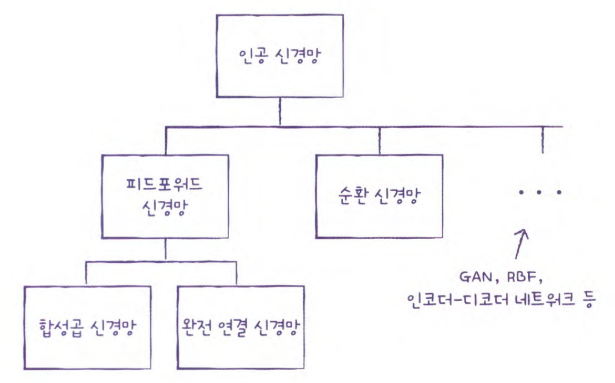

## 순환 신경망(recurrent neural network, RNN)
- 일반적인 완전 연결 신경망과 거의 비슷
- 이전 데이터의 처리 흐름을 순환하기 위한 고리 하나만 추가된 형태
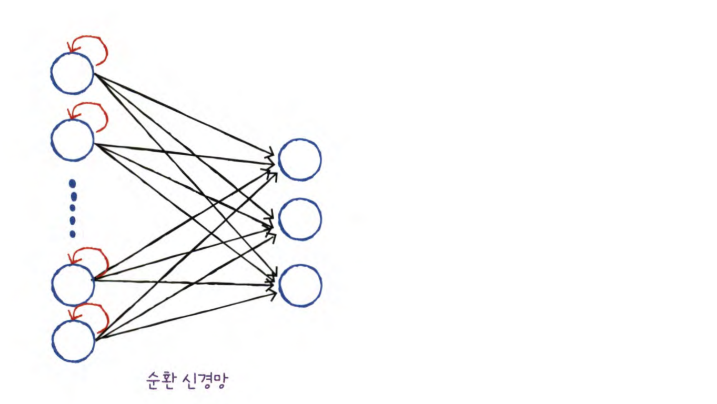
- 그림을 보면 뉴런의 출력이 다시 자기 자신으로 전달됨
    - 이것은 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용하는 것

### 예시
- A,B,C와 같은 3개의 샘플을 처리하는 순환 신경망의 뉴런
- O는 출력 결과

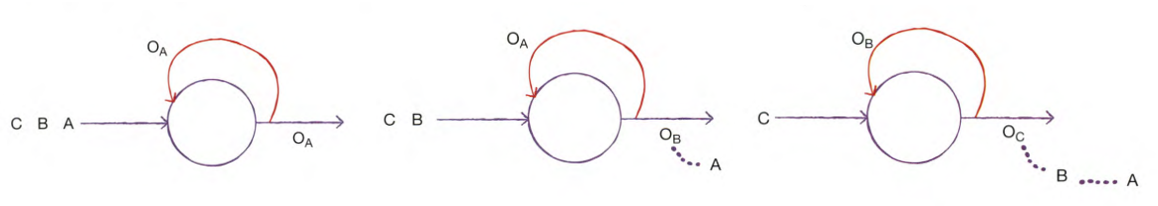
1) 첫 번째 샘플 A를 처리한 후 출력이 다음 층에 전달되고 동시에 다시 뉴런으로 입력됨  
- $O_A$는 A에 대한 정보가 들어있음

2) B를 처리할 때 A를 이용해 만든 $O_A$가 함께 사용됨  
- $O_B$는 A에 대한 정보도 포함되어 만들어진 결과

3) C를 처리할 때는 $O_B$를 함께 사용  
- $O_C$에는 B에 대한 정보가 포함되어 만들어진 결과


- 결과적으로 $O_C$는 A와 B의 정보 모두가 포함되었다고 볼 수 있음

#### 정리
- 순환 신경망은 이전 샘플에 대한 기억을 가진다고 이야기함
- 위와 같은 방식으로 샘플을 처리하는 한 단계를 타임스텝(timestep)이라고 함
- 당연히 타입스텝이 계속 진행될수록 순환되는 정보량은 점점 작아짐

### 순환 신경망 층을 표현하는 방식
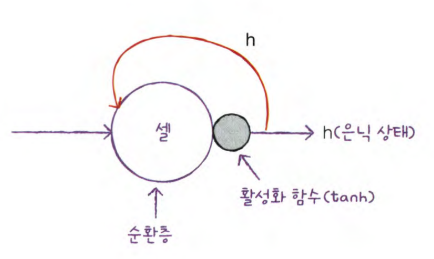 
- 순환 신경망에서 층을 셀(cell)이라고 표현함
- 하나의 셀에는 여러 개의 뉴런이 있지만 모든 뉴런을 표시하지 않고 하나의 셀로 층을 표현
- 셀, 뉴런, 유닛 모두 동일한 개념
- 셀의 출력은 은닉상태(hidden state)라고 부름
- 은닉층의 활성화 함수는 하이퍼볼릭 탄젠트 함수($tanh^2$)가 많이 사용됨

- 시그모이드와 비슷한 모양이지만 범위가 다름(-1 ~ 1)

- 순환 신경망에서도 활성화 함수는 반드시 필요함
- 피드 포워드 신경망에서 뉴런은 입력과 가중치를 곱하는데 순환 신경망도 동일함
- 순환 신경망에서는 이전 타임스텝의 은닉 상태에 곱해지는 가중치가 하나 더 추가된 형태
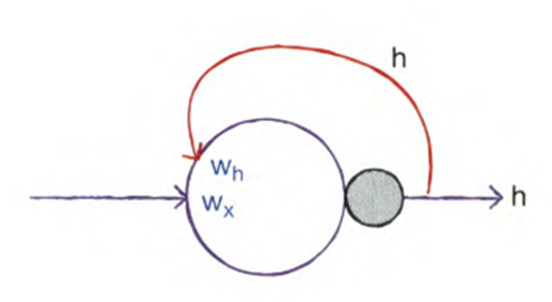
- 그림을 보면 2개의 가중치를 표현
    - $w_x$는 입력에 곱해지는 가중치, $w_h$는 이전 타임스텝의 은닉 상태에 곱해지는 가중치
    - 순환 신경망도 뉴런마다 하나의 절편(b)가 포함됨
    
- 3개의 셀이 있다고 가정하고 타입스텝으로 셀을 나누어서 그림으로 표현
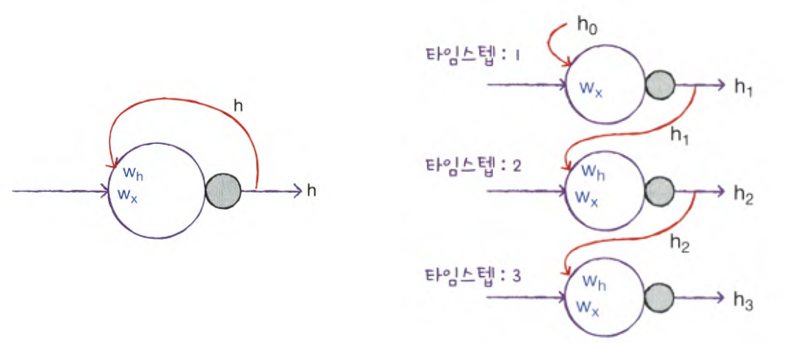
- 기억할 것은 모든 타임스텝에서 사용되는 가중치가 $w_x$와 $w_h$ 각각 하나라는 것
- $w_h$는 타임스텝에 따라 변화되는 뉴런의 출력을 학습함(순차 데이터를 이용할 때 필요)
- 가장 처음 타임스텝1에서 사용되는 가중치와 절편은 다음과 같이 결정됨
    - $w_x$는 랜덤한 값으로 시작
    - 이전 은닉 상태 $b_0$는 이전 타임스텝이 없으므로 모두 0으로 초기화함

## 셀의 가중치와 입출력

### 셀의 가중치와 모델파라미터 개수
- 순환 신경망의 셀에서 필요한 가중치 크기 계산해보기
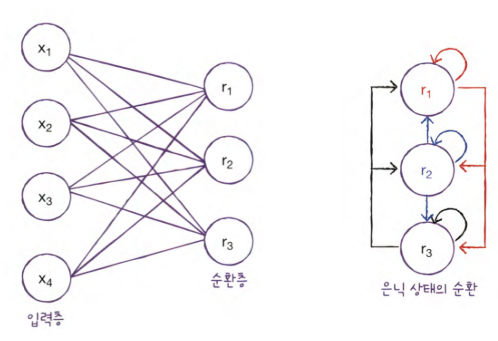
- $W_x$의 크기: 4 x 3 = 12 
    - 입력층과 순환층의 뉴런이 모두 완전 연결됨
- 다음 타임스텝에 재사용되는 은닉 상태에 적용될 가중치 $W_h$의 크기: 3 x 3 = 9
    - 이전 타임스텝의 은닉상태는 다음 타임스텝의 뉴런에 완전 연결
- 모델 파라미터 개수: 12 + 9 + 3
    - 가중치에 절편을 더한 값
    - 각 뉴런마다 하나의 절편이 있음(3)
    - 모델파라미터 = $W_x + W_h + 절편 $ 
- 순환층을 셀 하나로 표시할 수 밖에 없는 이유는 은닉상태가 모든 뉴런에 순환되므로 그림 표현이 어려움
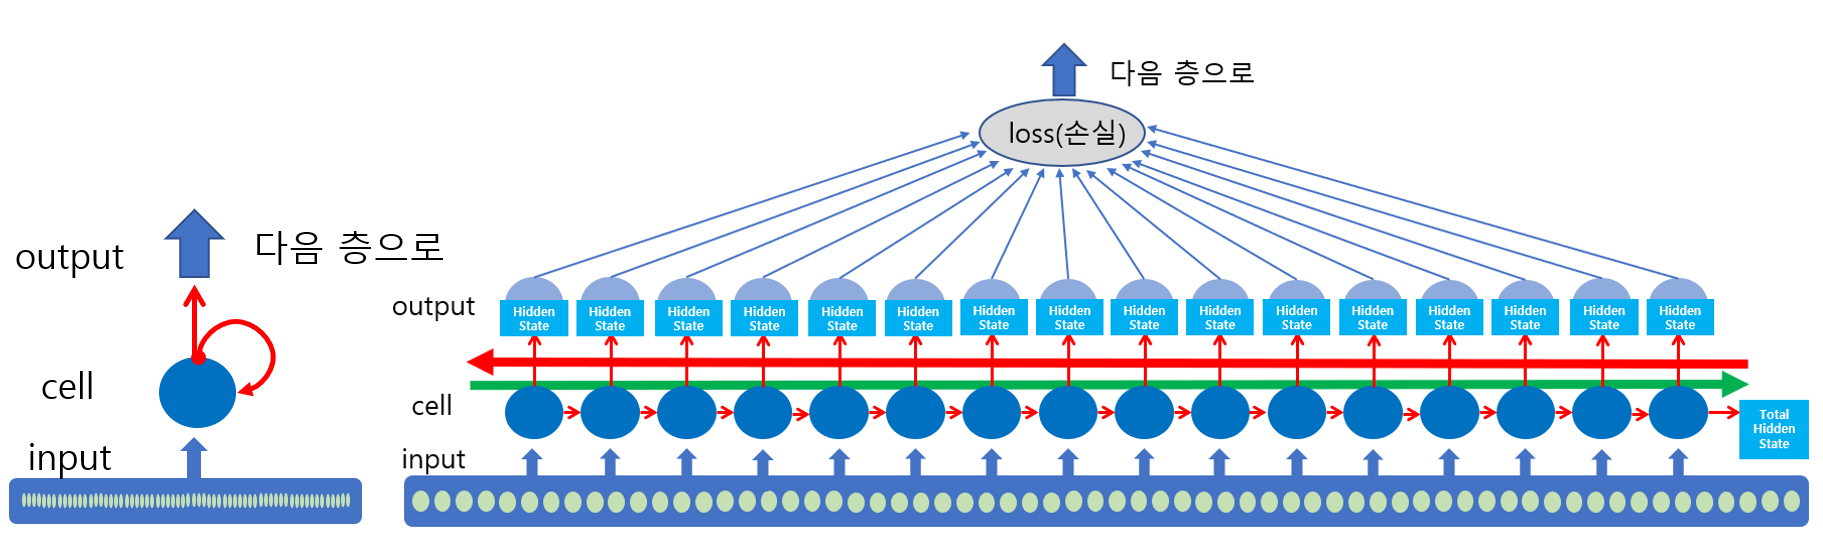

### 순환 신경망 동작 흐름(timestep) 이해 하기(gif)
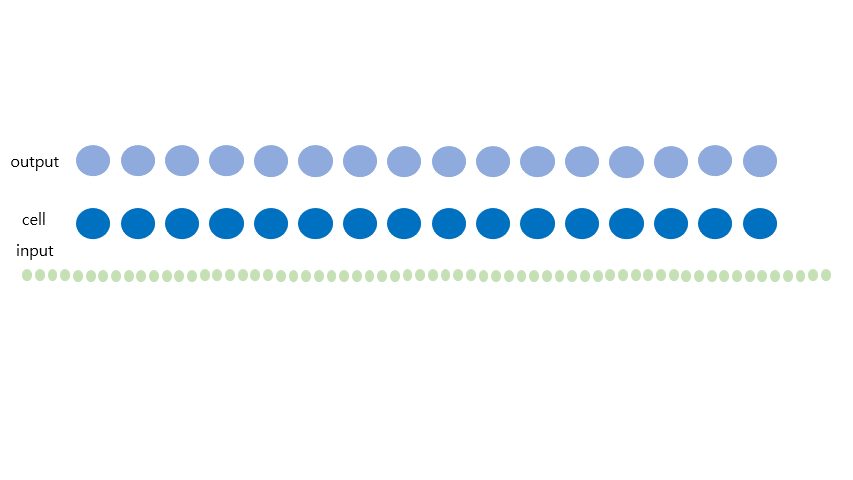

## 순환층의 입력과 출력

### 순환층의 입력
- 순환층은 일반적으로 샘플마다 2개의 차원을 가짐
- 하나의 샘플을 하나의 시퀀스라 지칭
- 시퀀스 안에 여러 개의 아이템이 들어있는데 이 시퀀스의 길이가 타임스텝 길이가 됨
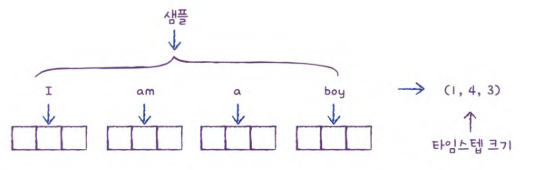
- 예시를 보면 4개의 단어로 이루어져 있음
- 각 단어를 3개의 벡터로 표현한다고 가정
- 입력 데이터가 순환층을 통과하면 두 번째, 세 번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력됨
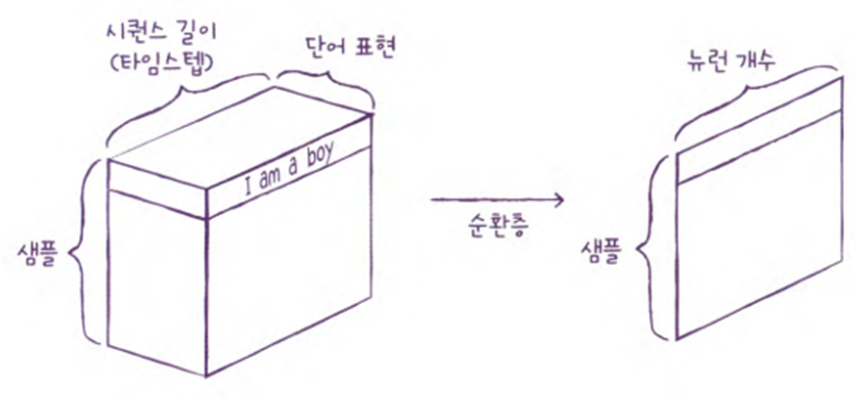
- 하나의 샘플은 시퀀스 길이(예제에서는 단어 개수)와 단어 표현(감성)의 2차원 배열
- 순환층을 통과하면 1차원 배열로 변경(순환층의 뉴런 개수)
- 사진에 대한 설명 만들기, 번역 등의 분석이라면 순환층의 각 셀의 출력이 활용됨(many to many 또는 one to many)
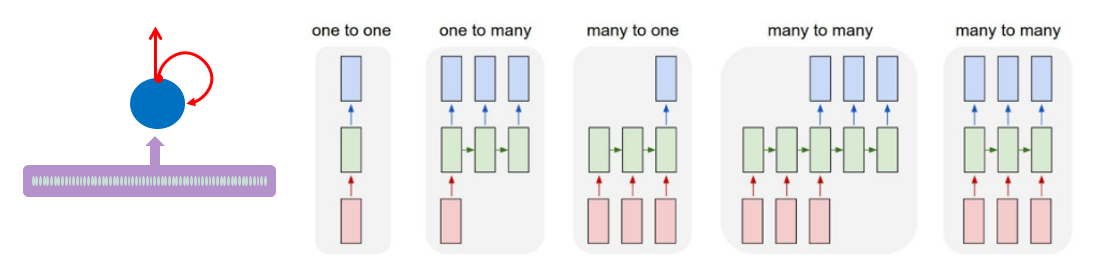
- 감성 분류(이진)에서는 순환층의 마지막 타임스템의 은닉상태만 사용됨(many to one)
- 만약 2개 이상의 순환층을 연결한다면 
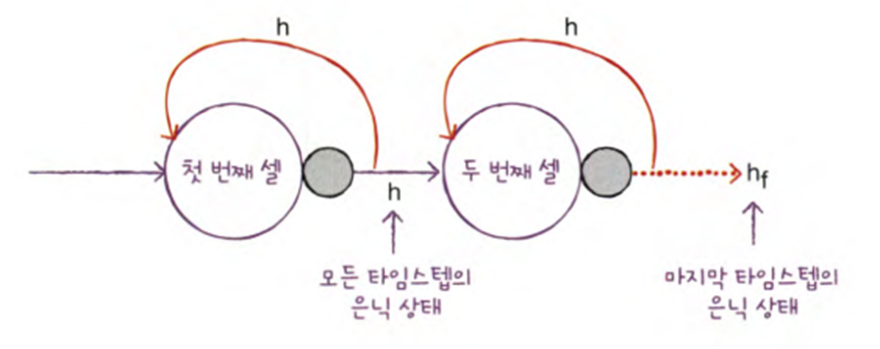
    - 마지막 셀을 제외한 모든 셀은 모든 타임스텝의 은닉상태를 다음 셀로 출력
    - 마지막 셀은 마지막 타임스텝의 은닉상태만 출력

### 순환층의 출력층 구성
- 순환 신경망 역시 마지막에 밀집층을 두고 클래스를 분류
- 다중 분류일 때는 출력층에 분류할 클래스 개수만큼의 뉴런을 두고 소프트맥스 활성화 함수 사용
- 이진 분류일 때는 하나의 뉴런을 두고 시그모이드 활성화 함수 사용

- 순환층(셀)은 출력이 1차원이므로 Flatten을 이용한 것처럼 데이터를 펼칠 필요가 없음
- 셀의 출력을 그대로 밀집층에 사용 가능

#### 예시
- 3개의 클래스를 가진 다중분류일 경우를 위해서 출력층에 3개의 뉴런과 소프트맥스 함수를 적용한 예
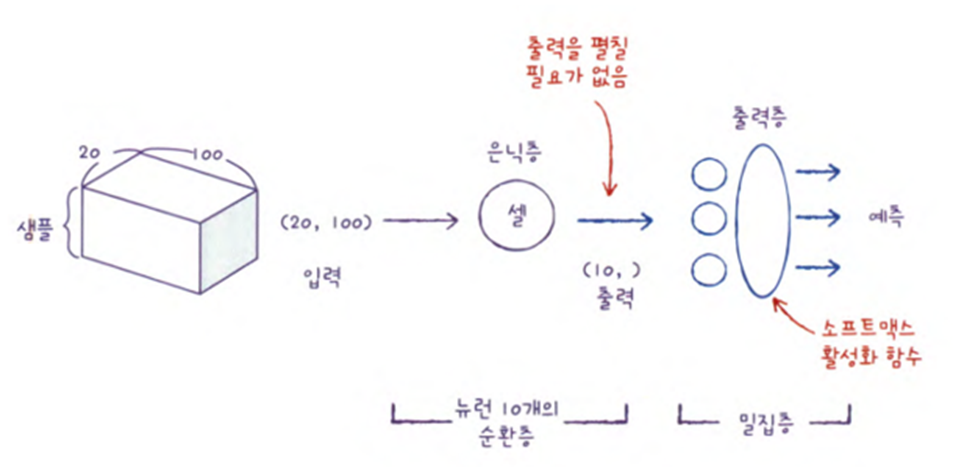
- 위 예제 그림에서 샘플은 20개의 타임스텝으로 이루어져 있음
- 각 타임스텝은 100개의 표현(특성)으로 이루어져 있음
- 이 샘플이 순환층의 셀을 통과하면 모든 타임스텝을 처리하고 난 후의 은닉상태만 출력됨
- 출력되는 은닉상태의 크기는 셀에 있는 뉴런의 개수가 되므로 (10,)
- 샘플마다 셀이 1차원 배열을 출력하기 때문에 합성곱 신경망처럼 1차원으로 펼치지 않고 바로 출력층에 연결